In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('thyroid_cancer_risk_data.csv')

In [3]:
df.drop('Patient_ID', axis='columns', inplace=True)

In [4]:
df

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212686,58,Female,India,Asian,No,No,No,No,Yes,No,2.00,0.64,11.92,1.48,Low,Benign
212687,89,Male,Japan,Middle Eastern,No,No,No,No,Yes,No,9.77,3.25,7.30,4.46,Medium,Benign
212688,72,Female,Nigeria,Hispanic,No,No,No,No,No,Yes,7.72,2.44,8.71,2.36,Medium,Benign
212689,85,Female,Brazil,Middle Eastern,No,No,No,No,No,Yes,5.62,2.53,9.62,1.54,Medium,Benign


In [5]:
df.isnull().sum()

Age                    0
Gender                 0
Country                0
Ethnicity              0
Family_History         0
Radiation_Exposure     0
Iodine_Deficiency      0
Smoking                0
Obesity                0
Diabetes               0
TSH_Level              0
T3_Level               0
T4_Level               0
Nodule_Size            0
Thyroid_Cancer_Risk    0
Diagnosis              0
dtype: int64

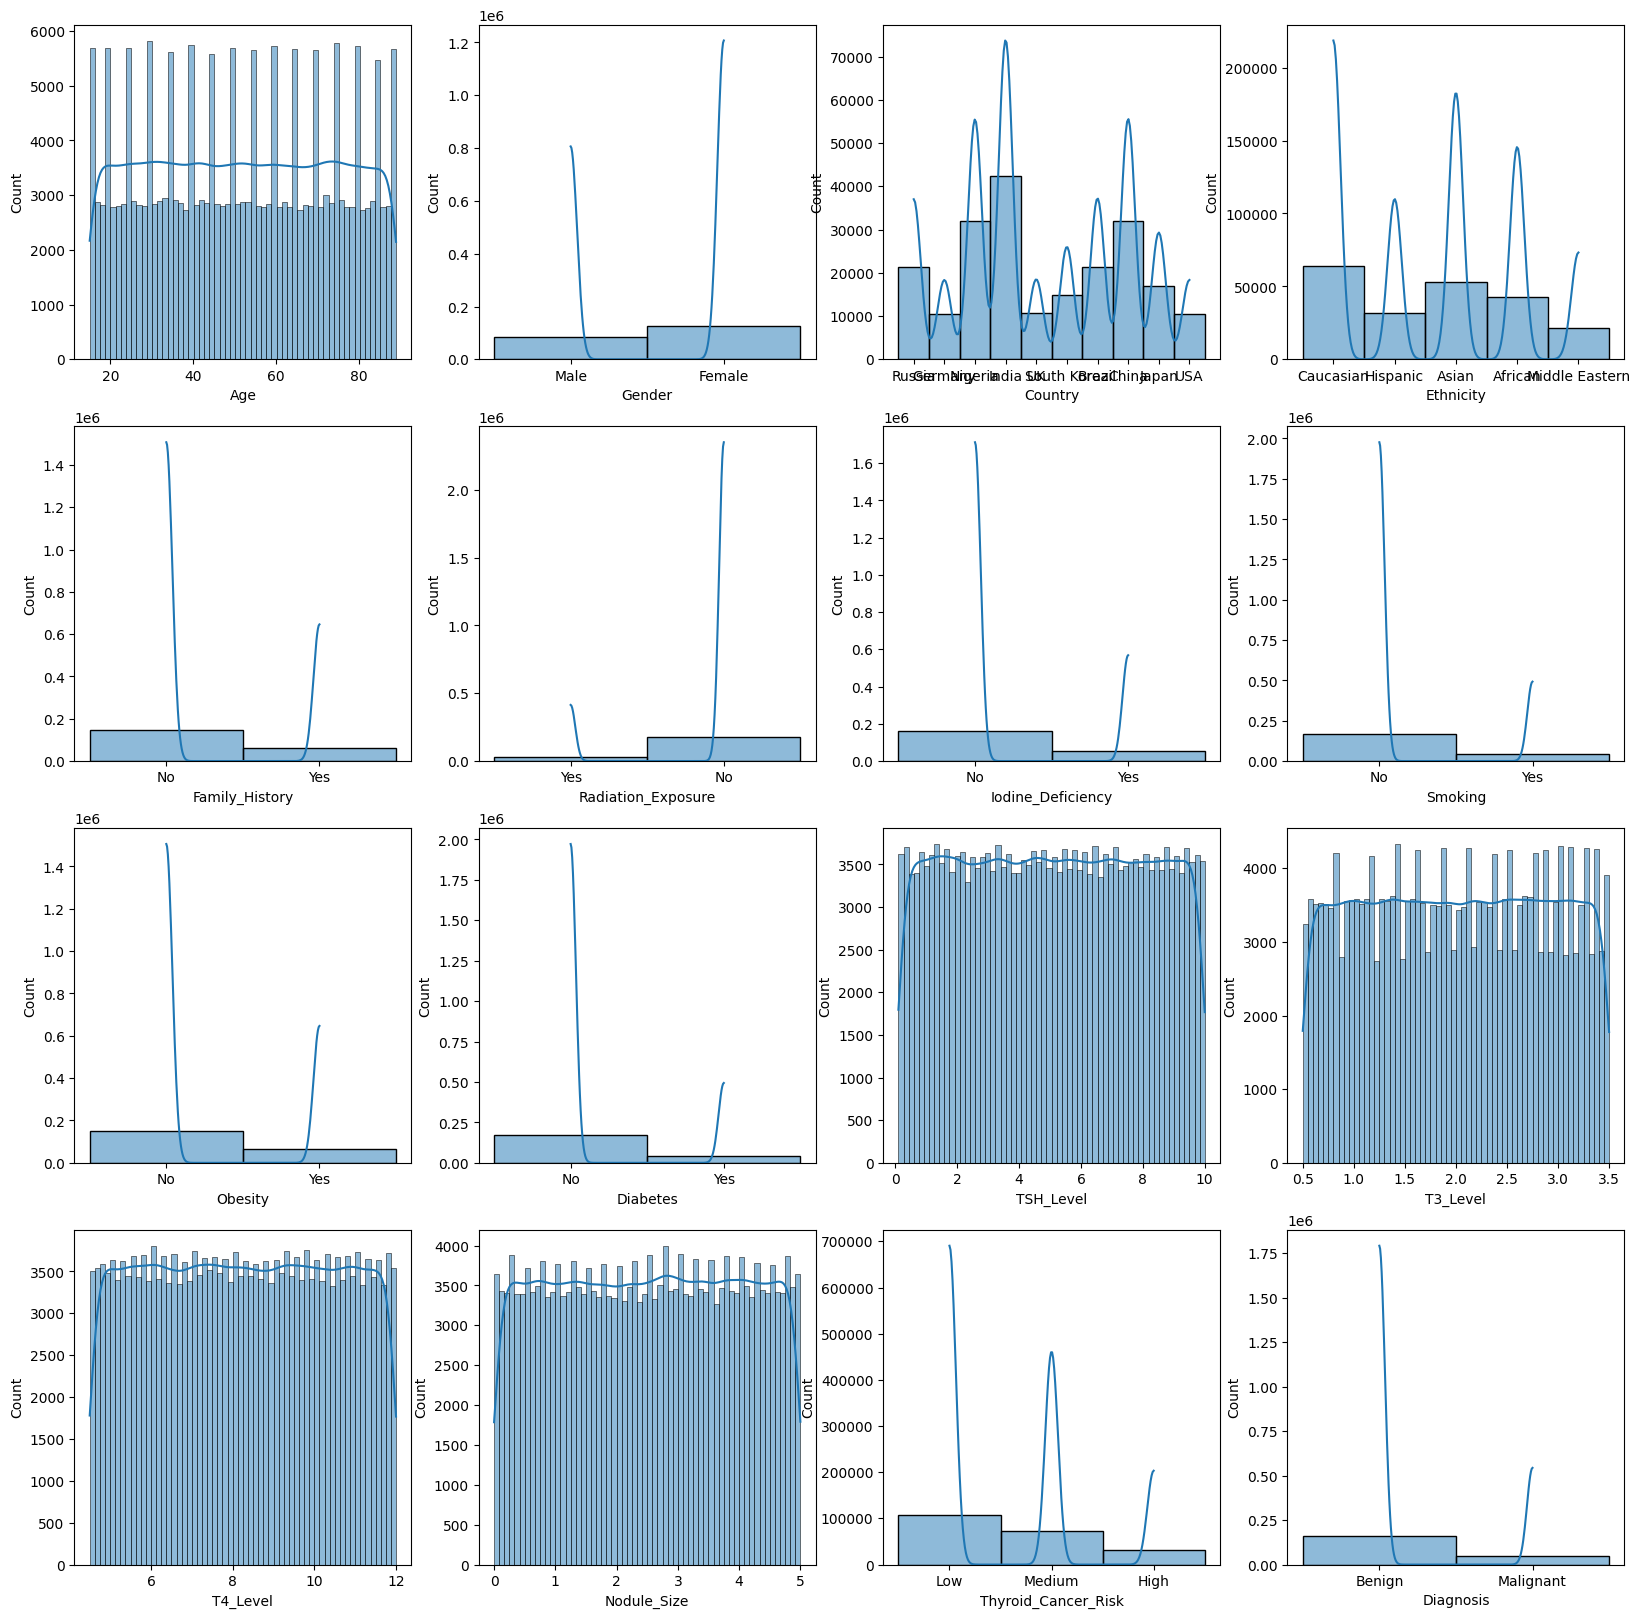

In [6]:
counter = 1
plt.figure(figsize=(20, 20))
for col in df.columns:
  plt.subplot(4, 4, counter)
  sns.histplot(df[col], kde=True)
  counter += 1

In [7]:
for col in df.columns:
  if df[col].dtype == 'object' and col != 'Diagnosis':
    dummies = pd.get_dummies(df[col])
    df = pd.concat([df, dummies], axis=1)
    for i in dummies.columns:
      df.rename(columns={i: col + '_' + i}, inplace=True)
    df.drop(col, axis=1, inplace=True)
df

,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size,Diagnosis,Gender_Female,Gender_Male,Country_Brazil,Country_China,...,Iodine_Deficiency_Yes,Smoking_No,Smoking_Yes,Obesity_No,Obesity_Yes,Diabetes_No,Diabetes_Yes,Thyroid_Cancer_Risk_High,Thyroid_Cancer_Risk_Low,Thyroid_Cancer_Risk_Medium
0,66,9.37,1.67,6.16,1.08,Benign,False,True,False,False,...,False,True,False,True,False,True,False,False,True,False
1,29,1.83,1.73,10.54,4.05,Benign,False,True,False,False,...,False,True,False,True,False,True,False,False,True,False
2,86,6.26,2.59,10.57,4.61,Benign,False,True,False,False,...,False,True,False,True,False,True,False,False,True,False
3,75,4.10,2.62,11.04,2.46,Benign,True,False,False,False,...,False,True,False,True,False,True,False,False,False,True
4,35,9.10,2.11,10.71,2.11,Benign,True,False,False,False,...,False,True,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212686,58,2.00,0.64,11.92,1.48,Benign,True,False,False,False,...,False,True,False,False,True,True,False,False,True,False
212687,89,9.77,3.25,7.30,4.46,Benign,False,True,False,False,...,False,True,False,False,True,True,False,False,False,True
212688,72,7.72,2.44,8.71,2.36,Benign,True,False,False,False,...,False,True,False,True,False,False,True,False,False,True
212689,85,5.62,2.53,9.62,1.54,Benign,True,False,True,False,...,False,True,False,True,False,False,True,False,False,True


In [8]:
df.columns.tolist()

['Age',
 'TSH_Level',
 'T3_Level',
 'T4_Level',
 'Nodule_Size',
 'Diagnosis',
 'Gender_Female',
 'Gender_Male',
 'Country_Brazil',
 'Country_China',
 'Country_Germany',
 'Country_India',
 'Country_Japan',
 'Country_Nigeria',
 'Country_Russia',
 'Country_South Korea',
 'Country_UK',
 'Country_USA',
 'Ethnicity_African',
 'Ethnicity_Asian',
 'Ethnicity_Caucasian',
 'Ethnicity_Hispanic',
 'Ethnicity_Middle Eastern',
 'Family_History_No',
 'Family_History_Yes',
 'Radiation_Exposure_No',
 'Radiation_Exposure_Yes',
 'Iodine_Deficiency_No',
 'Iodine_Deficiency_Yes',
 'Smoking_No',
 'Smoking_Yes',
 'Obesity_No',
 'Obesity_Yes',
 'Diabetes_No',
 'Diabetes_Yes',
 'Thyroid_Cancer_Risk_High',
 'Thyroid_Cancer_Risk_Low',
 'Thyroid_Cancer_Risk_Medium']

In [9]:
df['Indicator_1'] = df['TSH_Level']/df['T3_Level']
df['Indicator_2'] = df['TSH_Level']/df['T4_Level']
df['Indicator_3'] = df['Age']/df['TSH_Level']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

In [11]:
X = df.drop('Diagnosis', axis='columns')
y = df['Diagnosis']
smote = SMOTE()
smoteEnn = SMOTEENN()

In [12]:
X_sme, y_sme = smoteEnn.fit_resample(X, y)

In [13]:
X_sm, y_sm = smote.fit_resample(X_sme, y_sme)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.5, stratify=y_sm)

In [12]:
models = [KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier()]
for model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Benign       0.86      0.78      0.82     81598
   Malignant       0.80      0.87      0.83     81598

    accuracy                           0.83    163196
   macro avg       0.83      0.83      0.83    163196
weighted avg       0.83      0.83      0.83    163196

              precision    recall  f1-score   support

      Benign       0.80      0.79      0.80     81598
   Malignant       0.79      0.81      0.80     81598

    accuracy                           0.80    163196
   macro avg       0.80      0.80      0.80    163196
weighted avg       0.80      0.80      0.80    163196

              precision    recall  f1-score   support

      Benign       0.85      0.94      0.89     81598
   Malignant       0.94      0.83      0.88     81598

    accuracy                           0.89    163196
   macro avg       0.89      0.89      0.89    163196
weighted avg       0.89      0.89      0.89    163196

              preci

In [16]:
from sklearn.model_selection import GridSearchCV
m = RandomForestClassifier()
params = {
    'n_estimators':[300, 500, 1000],
}
model = GridSearchCV(estimator=m, param_grid=params, cv=3)
test = model.fit(X_train, y_train)
print(test.best_params_)
print(test.best_score_)

{'n_estimators': 1000}
0.885481268282789


In [15]:
final_model = RandomForestClassifier(n_estimators=1000)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
print('score:', final_model.score(X_test, y_test))

score: 0.8485099337748344


In [16]:
import pickle
with open('thyroid_cancer_risk_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)